## Nearest Neighbors
### Agenda
1. Fundamentals of Nearest Neighbor
2. Unspervised Nearest Neighbors
3. Nearest Neighbors for Classification
4. Nearest Neighbors for Regression
5. Nearest Centroid Classifier

### 1. Fundamentals of Nearest Neighbor
* These are non-generalizing learning models .i.e simply stores all the training data.
* Stores data into fast access data structure like Ball Tree & KD Tree
* The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label/value from these.
* The number of samples can be a user-defined constant or configured radius
* Very useful when decision boundry is very irregular.

### 2. Unsupervised Nearest Neighbor
* Based on the algorithm configured training data is stored
* For an unknown data, return the shortest Euclidean distance between configured k 
* Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
from sklearn.neighbors import NearestNeighbors

In [195]:
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

In [196]:
from sklearn.datasets import make_blobs

In [197]:
X,_ = make_blobs(n_features=2, n_samples=10, cluster_std=5)

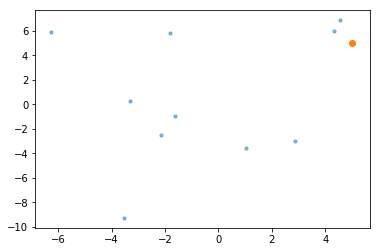

In [198]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter([5],[5])

In [199]:
nn.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=1.0)

In [200]:
nn.kneighbors([[5,5]])

(array([[1.15317476, 1.89964951]]), array([[6, 9]], dtype=int64))

In [201]:
_,X_nearest = nn.kneighbors([[5,5]])

In [204]:
nearest = X[X_nearest[0]]

In [205]:
X_nearest

array([[6, 9]], dtype=int64)

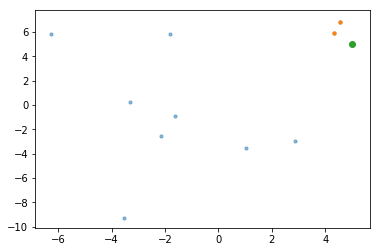

In [206]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')
plt.scatter([5],[5])

### 3. Nearest Neighbors for Classification
* A query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
* Two types of nearest neighbor classifier
  - KNeighboursClassifier ( based on configured k )
  - RadiusNeighbourClassifier ( based on configured r )
* Weights can be ‘uniform’ or ‘distance’. It  assigns weights proportional to the inverse of the distance from the query point.

In [85]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [86]:
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5)

In [71]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)

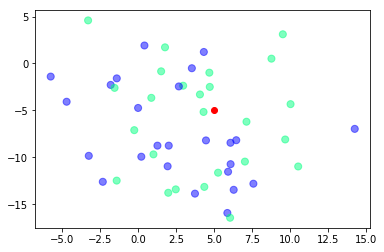

In [84]:
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')

In [90]:
knc.fit(X,Y)
rnc.fit(X,Y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=5,
             weights='uniform')

In [91]:
knc_pred = knc.predict([[5,-5]])

In [93]:
knc_pred

array([1])

In [96]:
knc.kneighbors([[5,-5]])

(array([[0.72517301, 1.94212795, 2.44043399, 2.52049112, 3.24551058]]),
 array([[17, 37, 32, 15,  1]], dtype=int64))

In [102]:
_, knc_neighbors = knc.kneighbors([[5,-5]])

In [138]:
knc_neighbors

array([[17, 37, 32, 15,  1]], dtype=int64)

In [92]:
rnc_pred = rnc.predict([[5,-5]])

In [94]:
rnc_pred

array([1])

In [101]:
rnc.radius_neighbors([[5,-5]])

(array([array([3.24551058, 4.03329819, 3.33286427, 3.49092452, 2.52049112,
        0.72517301, 4.80582379, 2.44043399, 4.35485471, 3.61289927,
        1.94212795, 3.45846403, 4.73004628])], dtype=object),
 array([array([ 1,  5,  8, 10, 15, 17, 29, 32, 33, 36, 37, 38, 42], dtype=int64)],
       dtype=object))

In [103]:
_, rnc_neighbors = rnc.radius_neighbors([[5,-5]])

In [133]:
rnc_neighbors[0]

array([ 1,  5,  8, 10, 15, 17, 29, 32, 33, 36, 37, 38, 42], dtype=int64)

#### Visualizing for NearestNeighbourClassifier

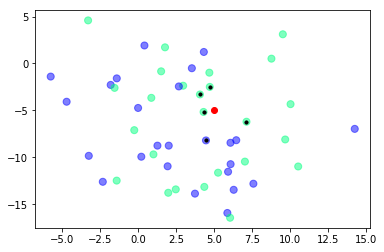

In [139]:
nearest = X[knc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

#### Visualizing for RadiusNeighbourClassifier

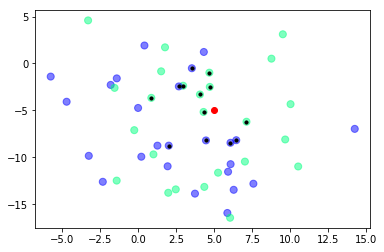

In [137]:
nearest = X[rnc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

* Understanding weights - Nearer neighbor has more impact when configured with weight='distance' parameter

In [154]:
rnc = RadiusNeighborsClassifier(radius=5, weights='distance')

#### Impact of number of neighbors on decision boundry
<img src="https://github.com/awantik/machine-learning-slides/blob/master/mlnn4.png?raw=true">

<img src="https://github.com/awantik/machine-learning-slides/blob/master/mlnn3.png?raw=true">

### 4. Nearest Neighbors for Regression
* The labels of data are continues
* The label assigned to a query point is computed based the mean/medium of the labels of its nearest neighbors.
* Neighbors to be considered can be based on count or radius distance
  - KNeighbourRegressor
  - RadiusNeighbourRegressor
* 'weight' parameter to control impact of neighbor based on closeness
* NearestNeighborRegressor is capable of predicting mutiple outputs

In [155]:
from sklearn.datasets import fetch_olivetti_faces

In [159]:
faces = fetch_olivetti_faces()

In [165]:
targets = faces.target

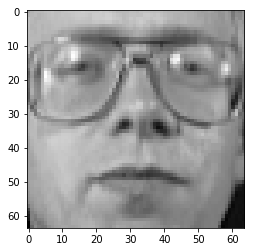

In [160]:
plt.imshow(faces.images[11], cmap='gray')

In [162]:
faces.images.shape

(400, 64, 64)

In [163]:
faces.data.shape

(400, 4096)

In [166]:
train = faces.data[targets < 30]
test = faces.data[targets >= 30]

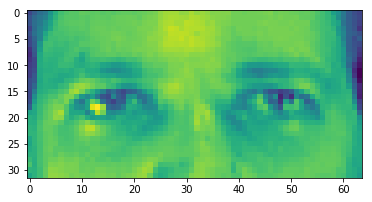

In [167]:
plt.imshow(train[0][:2048].reshape(32,64))

In [168]:
trainX = train[:,:2048]
trainY = train[:,2048:]
testX = test[:,:2048]
testY = test[:,2048:]

In [169]:
from sklearn.neighbors import KNeighborsRegressor

In [172]:
nn_r = KNeighborsRegressor(n_neighbors=20,weights='distance', n_jobs=-1)

In [173]:
nn_r.fit(trainX,trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='distance')

In [175]:
sample = testX[::10]

In [180]:
res = nn_r.predict(sample)

In [181]:
final = np.hstack([sample,res])

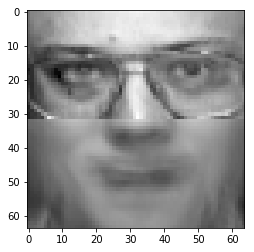

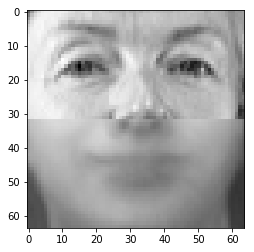

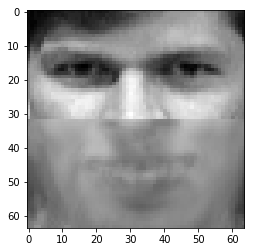

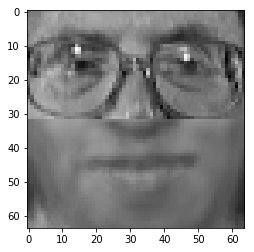

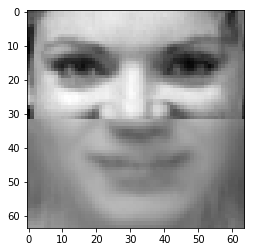

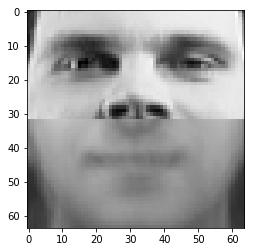

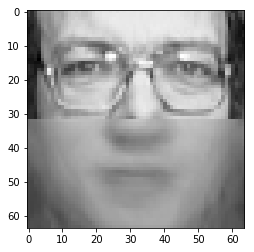

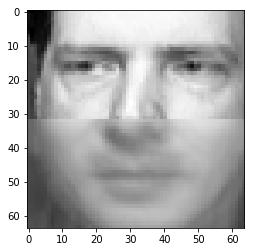

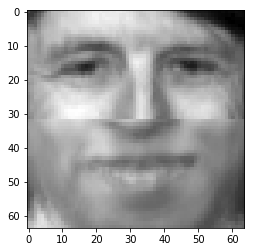

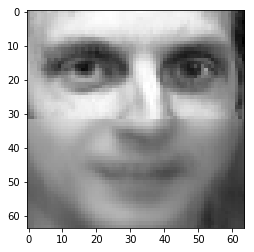

In [185]:
for img in final:
    plt.imshow(img.reshape(64,64), cmap='gray')
    plt.show()

### Nearest Centroid Classifier
* Used for classification
* Computes the centroid for each class.
* Measures the distance ( generally Euclidean ) of the data point X to the centroid of each class.
* If the distance is of X and the centroid of a particular class is minimum then it assigns that class to the data point X ( The argmin statement in the picture you have provided ) i.e Y predicts the centroid closest to the point X
* It's different from KMeans, since KMeans identifies the clusters & here we assign data to cluster

In [186]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [188]:
from sklearn.datasets import load_iris

In [189]:
iris = load_iris()

In [190]:
nc = NearestCentroid()

In [191]:
nc.fit(iris.data, iris.target)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [192]:
nc.score(iris.data, iris.target)

0.9266666666666666